In [2]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score, auc, roc_auc_score, log_loss, \
    mean_squared_error
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
import multiprocessing

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from rit.tree import DecisionTreeClassifier as MyDecisionTreeClassifier
from rit.tree import DecisionTreeRegressor as MyDecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from rit.ensemble import RandomForestClassifier as MyRandomForestClassifier
from rit.ensemble import RandomForestRegressor as MyRandomForestRegressor

n_cpu = multiprocessing.cpu_count()

# RandomForest feature importance with highly correlated features
https://explained.ai/rf-importance/


# Synthetic dataset 

{'max_depth': 20, 'n_estimators': 1000}

0.985941647154093

[({'max_depth': 20, 'n_estimators': 1000}, 0.985941647154093)]

/tmp/ipykernel_378143/3277566157.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


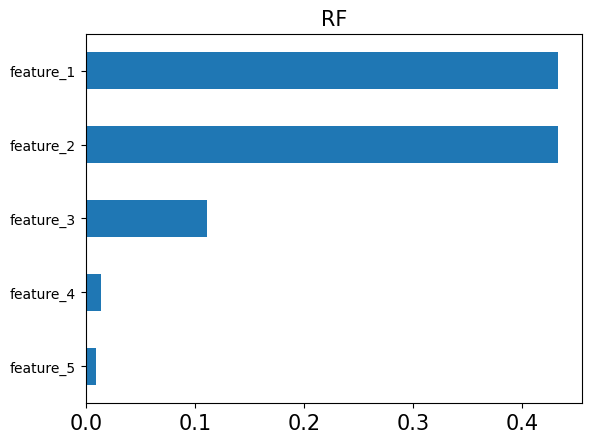

{'max_depth': 20, 'n_estimators': 1000}

0.9827448769540287

[({'max_depth': 20, 'n_estimators': 1000}, 0.9827448769540287)]

/tmp/ipykernel_378143/3277566157.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


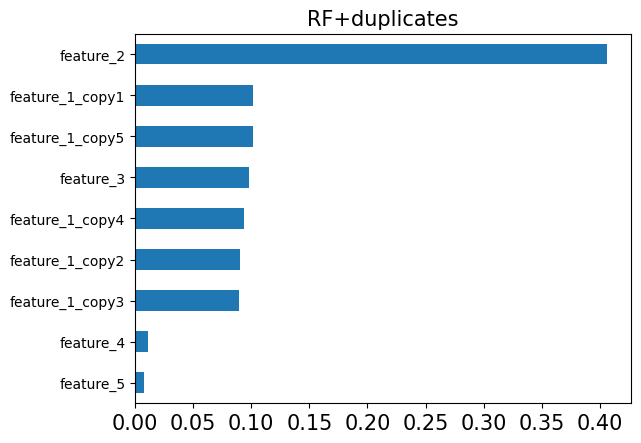

{'max_depth': 20, 'n_estimators': 1000}

0.9823024538997857

[({'max_depth': 20, 'n_estimators': 1000}, 0.9823024538997857)]

/tmp/ipykernel_378143/3277566157.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


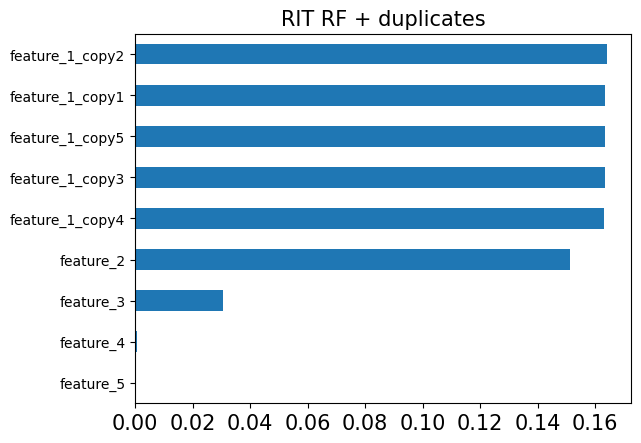

In [7]:
n_samples = 10_000
n_features = 5 
X_rand = np.random.rand(n_samples, n_features)
y = 10 * X_rand[:,0] -  10 * X_rand[:,1] + 5 * X_rand[:,2] - X_rand[:,3]
X_array = X_rand +  np.random.rand(n_samples, n_features) / 10
X = pd.DataFrame(columns=['feature_' + str(i+1) for i in range(n_features)], data=X_array)

# RF
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [1000]}
n_params = math.prod([len(v) for v in params.values()])
clf = GridSearchCV(RandomForestRegressor(max_features='sqrt', 
                                          random_state=0, 
                                          max_leaf_nodes=2**max(params['max_depth']),
                                          bootstrap=True,
                                          oob_score=True,
                                          n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RF', fontsize=15)
plt.show()

#RF + duplicates
X['feature_1_copy1'] = X['feature_1']
X['feature_1_copy2'] = X['feature_1']
X['feature_1_copy3'] = X['feature_1']
X['feature_1_copy4'] = X['feature_1']
X['feature_1_copy5'] = X['feature_1']
X = X.drop(['feature_1'], axis=1)

# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [1000]}
n_params = math.prod([len(v) for v in params.values()])
clf = GridSearchCV(RandomForestRegressor(max_features='sqrt', 
                                          random_state=0, 
                                          max_leaf_nodes=2**max(params['max_depth']),
                                          bootstrap=True,
                                          oob_score=True,
                                          n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RF+duplicates', fontsize=15)
plt.show()

#RIT RF + duplicates
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [1000]}
n_params = math.prod([len(v) for v in params.values()])
clf = GridSearchCV(MyRandomForestRegressor(max_features='sqrt', 
                                            random_state=0, 
                                            max_leaf_nodes=2**max(params['max_depth']),
                                            bootstrap=True,
                                            oob_score=True,
                                            n_jobs=max(n_cpu//n_params, 1),
                                            subforest_importance=True,
                                            normalize_importance=False,
                                            rit_alpha=0.1),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RIT RF + duplicates', fontsize=15)
plt.show()

{'max_depth': 20, 'n_estimators': 1000}

0.0769226587502283

[({'max_depth': 20, 'n_estimators': 1000}, 0.0769226587502283)]

/tmp/ipykernel_378143/1462519301.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


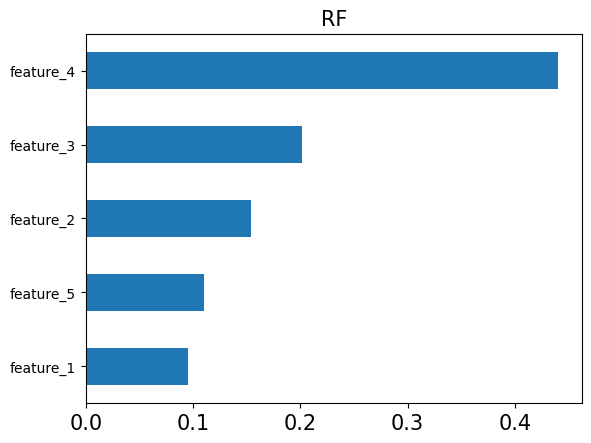

{'max_depth': 20, 'n_estimators': 1000}

-0.06248041255828296

[({'max_depth': 20, 'n_estimators': 1000}, -0.06248041255828296)]

/tmp/ipykernel_378143/1462519301.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


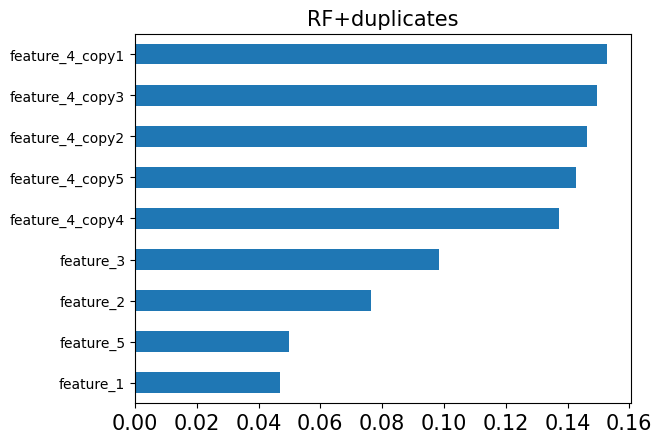

{'max_depth': 20, 'n_estimators': 1000}

-0.11647239199994197

[({'max_depth': 20, 'n_estimators': 1000}, -0.11647239199994197)]

/tmp/ipykernel_378143/1462519301.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


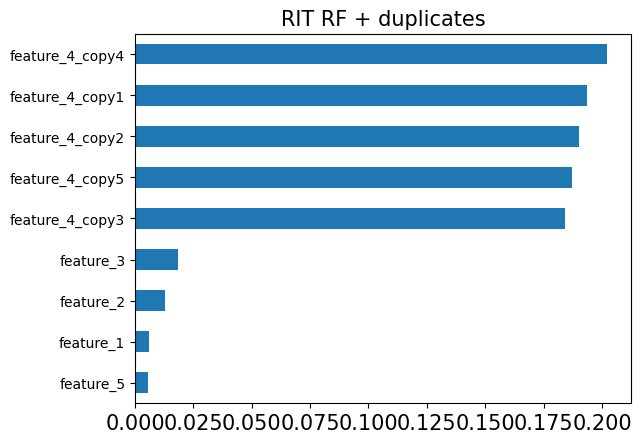

In [8]:
n_samples = 10_000
n_features = 5 
X_rand = np.random.rand(n_samples, n_features)
y = X_rand[:,0] * X_rand[:,1] + X_rand[:,2] / X_rand[:,3]
X_array = X_rand +  np.random.rand(n_samples, n_features) / 10
X = pd.DataFrame(columns=['feature_' + str(i+1) for i in range(n_features)], data=X_array)

# RF
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [1000]}
n_params = math.prod([len(v) for v in params.values()])
clf = GridSearchCV(RandomForestRegressor(max_features='sqrt', 
                                          random_state=0, 
                                          max_leaf_nodes=2**max(params['max_depth']),
                                          bootstrap=True,
                                          oob_score=True,
                                          n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RF', fontsize=15)
plt.show()

#RF + duplicates
X['feature_4_copy1'] = X['feature_4']
X['feature_4_copy2'] = X['feature_4']
X['feature_4_copy3'] = X['feature_4']
X['feature_4_copy4'] = X['feature_4']
X['feature_4_copy5'] = X['feature_4']
X = X.drop(['feature_4'], axis=1)

# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [1000]}
n_params = math.prod([len(v) for v in params.values()])
clf = GridSearchCV(RandomForestRegressor(max_features='sqrt', 
                                          random_state=0, 
                                          max_leaf_nodes=2**max(params['max_depth']),
                                          bootstrap=True,
                                          oob_score=True,
                                          n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RF+duplicates', fontsize=15)
plt.show()

#RIT RF + duplicates
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [1000]}
n_params = math.prod([len(v) for v in params.values()])
clf = GridSearchCV(MyRandomForestRegressor(max_features='sqrt', 
                                            random_state=0, 
                                            max_leaf_nodes=2**max(params['max_depth']),
                                            bootstrap=True,
                                            oob_score=True,
                                            n_jobs=max(n_cpu//n_params, 1),
                                            subforest_importance=True,
                                            normalize_importance=False,
                                            rit_alpha=0.1),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RIT RF + duplicates', fontsize=15)
plt.show()

{'max_depth': 20, 'n_estimators': 1000}

0.9584453077685033

[({'max_depth': 20, 'n_estimators': 1000}, 0.9584453077685033)]

/tmp/ipykernel_431441/2035081647.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


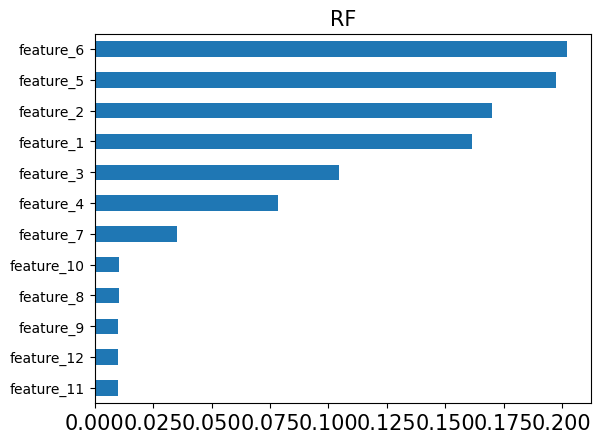

{'max_depth': 20, 'n_estimators': 1000}

0.9516562255514002

[({'max_depth': 20, 'n_estimators': 1000}, 0.9516562255514002)]

/tmp/ipykernel_431441/2035081647.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


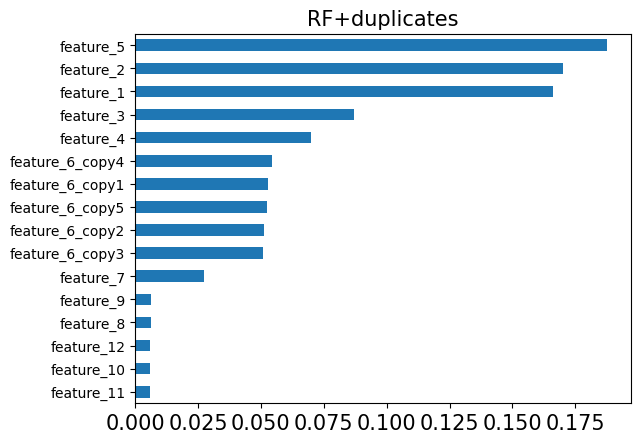

{'max_depth': 20, 'n_estimators': 1000}

0.9245415633943223

[({'max_depth': 20, 'n_estimators': 1000}, 0.9245415633943223)]

/tmp/ipykernel_431441/2035081647.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


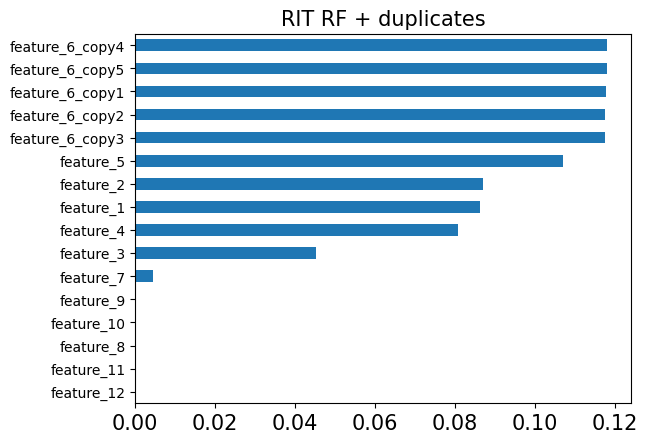

In [34]:
n_features = 12
n_samples = 10_000
n_corr = 4
mean = np.zeros([n_features])
cov = np.identity(n_features)
eps = np.random.normal(0, 0.5, n_features)

for i in range(n_corr):
    for j in range(n_corr):
        if i != j:
            cov[i][j] = 0.9
       
X_array = np.random.multivariate_normal(mean, cov, size=n_samples)
X = pd.DataFrame(columns=['feature_' + str(i+1) for i in range(n_features)], data=X_array)

betta = [5, 5, 2, 0, -5, -5, -2, 0, 0, 0, 0, 0]

y = X_array * betta + eps

# RF
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [1000]}
n_params = math.prod([len(v) for v in params.values()])
clf = GridSearchCV(RandomForestRegressor(max_features='sqrt', 
                                          random_state=0, 
                                          max_leaf_nodes=2**max(params['max_depth']),
                                          bootstrap=True,
                                          oob_score=True,
                                          n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RF', fontsize=15)
plt.show()

#RF + duplicates
X['feature_6_copy1'] = X['feature_6']
X['feature_6_copy2'] = X['feature_6']
X['feature_6_copy3'] = X['feature_6']
X['feature_6_copy4'] = X['feature_6']
X['feature_6_copy5'] = X['feature_6']
X = X.drop(['feature_6'], axis=1)

# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [1000]}
n_params = math.prod([len(v) for v in params.values()])
clf = GridSearchCV(RandomForestRegressor(max_features='sqrt', 
                                          random_state=0, 
                                          max_leaf_nodes=2**max(params['max_depth']),
                                          bootstrap=True,
                                          oob_score=True,
                                          n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RF+duplicates', fontsize=15)
plt.show()

#RIT RF + duplicates
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [1000]}
n_params = math.prod([len(v) for v in params.values()])
clf = GridSearchCV(MyRandomForestRegressor(max_features='sqrt', 
                                            random_state=0, 
                                            max_leaf_nodes=2**max(params['max_depth']),
                                            bootstrap=True,
                                            oob_score=True,
                                            n_jobs=max(n_cpu//n_params, 1),
                                            subforest_importance=True,
                                            normalize_importance=False,
                                            rit_alpha=0.1),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RIT RF + duplicates', fontsize=15)
plt.show()


## USUAL DATASETS

### Give_me_some_credit

{'max_depth': 20, 'n_estimators': 1000}

0.585471586236585

[({'max_depth': 20, 'n_estimators': 1000}, 0.585471586236585)]

/tmp/ipykernel_2304728/3725197170.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


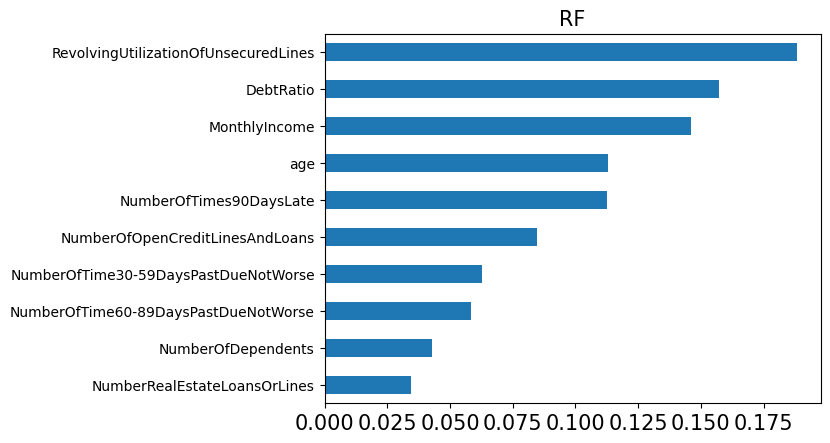

{'max_depth': 20, 'n_estimators': 1000}

0.5816379931562665

[({'max_depth': 20, 'n_estimators': 1000}, 0.5816379931562665)]

/tmp/ipykernel_2304728/3725197170.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


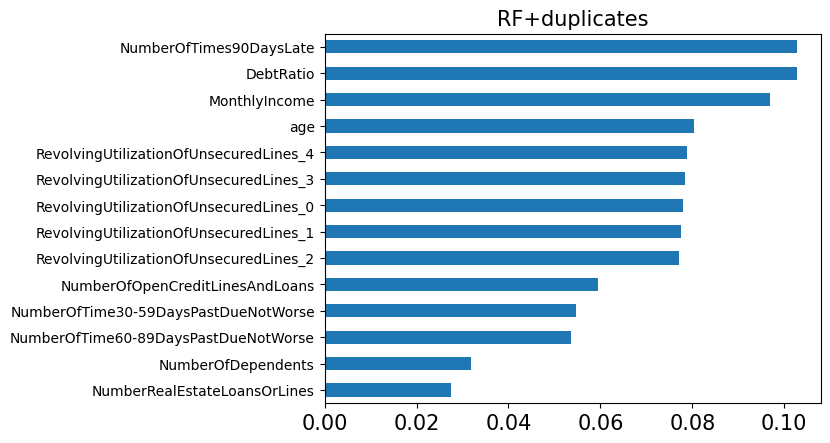

{'max_depth': 20, 'n_estimators': 1000}

0.5895143980244721

[({'max_depth': 20, 'n_estimators': 1000}, 0.5895143980244721)]

/tmp/ipykernel_2304728/3725197170.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


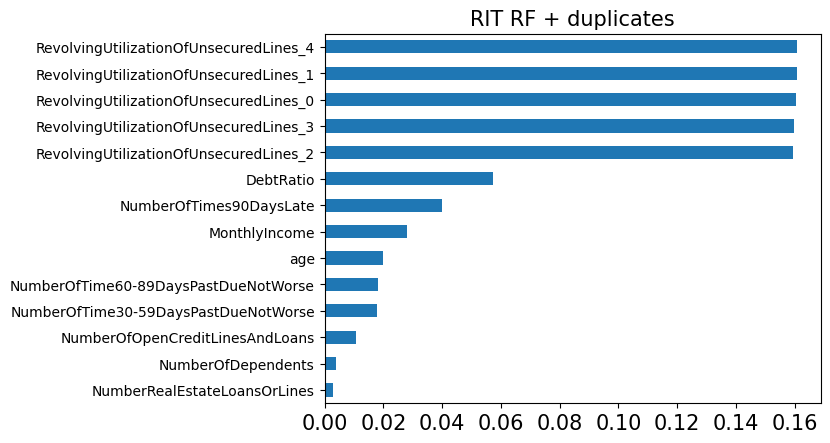

In [2]:
#https://www.kaggle.com/c/GiveMeSomeCredit/
X = pd.read_csv(
    'https://raw.githubusercontent.com/adasegroup/ML2020_seminars/master/seminar5/data/give_me_some_credit.csv', 
    index_col=0)
X = X.dropna()
y = X['SeriousDlqin2yrs']
X = X.drop(['SeriousDlqin2yrs'], axis=1)
# X = X.iloc[::1, :]
# y = y.iloc[::1] 
# idx = [True if v>0 or np.random.randint(0, 10, 1) == 0 else False for v in y]
# X = X[idx]
# y = y[idx]
score_func = roc_auc_score

# RF
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [1000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(RandomForestClassifier(max_features='sqrt', 
                                          random_state=0, 
                                          max_leaf_nodes=2**max(params['max_depth']),
                                          bootstrap=True,
                                          oob_score=score_func,
                                          n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RF', fontsize=15)
plt.show()

#RF + duplicates
X['RevolvingUtilizationOfUnsecuredLines_0'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_1'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_2'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_3'] = X['RevolvingUtilizationOfUnsecuredLines']
X['RevolvingUtilizationOfUnsecuredLines_4'] = X['RevolvingUtilizationOfUnsecuredLines']
X = X.drop(['RevolvingUtilizationOfUnsecuredLines'], axis=1)

# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [1000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(RandomForestClassifier(max_features='sqrt', 
                                          random_state=0, 
                                          max_leaf_nodes=2**max(params['max_depth']),
                                          bootstrap=True,
                                          oob_score=score_func,
                                          n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RF+duplicates', fontsize=15)
plt.show()

#RIT RF + duplicates
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [1000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(MyRandomForestClassifier(max_features='sqrt', 
                                            random_state=0, 
                                            max_leaf_nodes=2**max(params['max_depth']),
                                            bootstrap=True,
                                            oob_score=score_func,
                                            n_jobs=max(n_cpu//n_params, 1),
                                            subforest_importance=True,
                                            normalize_importance=False,
                                            rit_alpha=0.1),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RIT RF + duplicates', fontsize=15)
plt.show()

### Breast canser

{'max_depth': 6, 'n_estimators': 10000}

0.961335676625659

[({'max_depth': 6, 'n_estimators': 10000}, 0.961335676625659)]

/tmp/ipykernel_2304728/1886508676.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


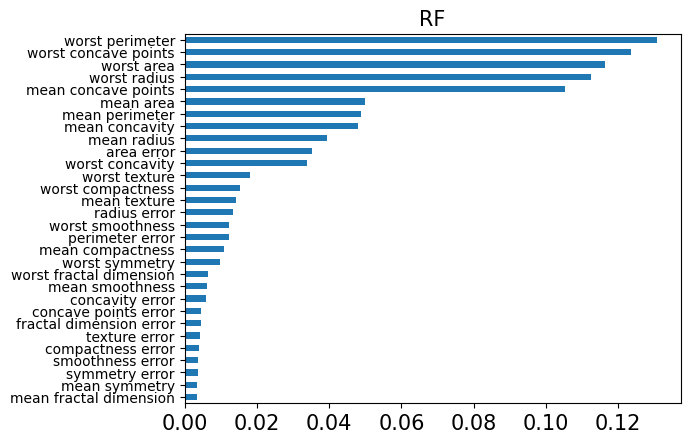

{'max_depth': 8, 'n_estimators': 10000}

0.9630931458699473

[({'max_depth': 8, 'n_estimators': 10000}, 0.9630931458699473)]

/tmp/ipykernel_2304728/1886508676.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


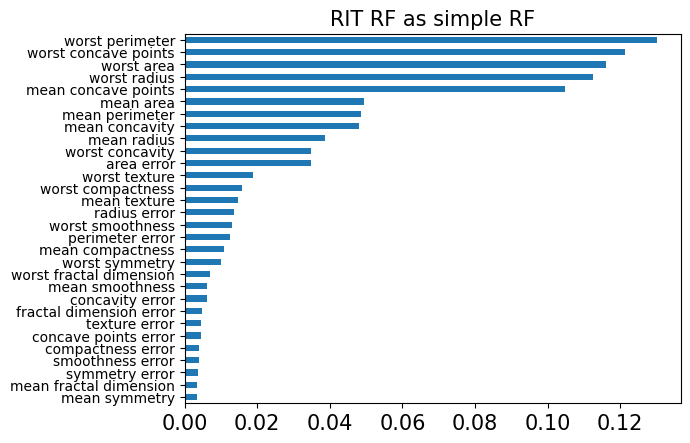

{'max_depth': 7, 'n_estimators': 10000}

0.961335676625659

[({'max_depth': 7, 'n_estimators': 10000}, 0.961335676625659)]

/tmp/ipykernel_2304728/1886508676.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


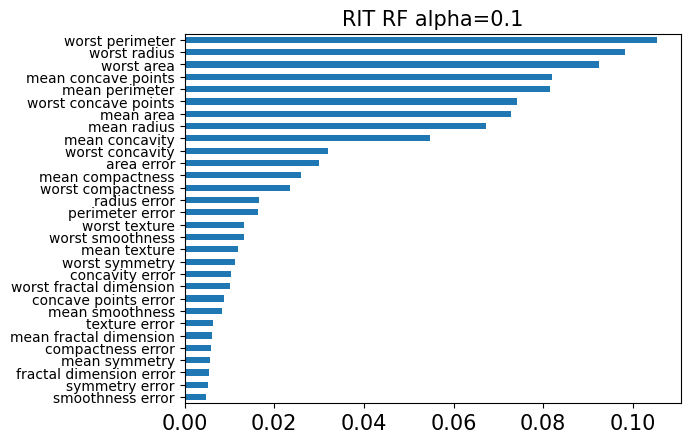

{'max_depth': 7, 'n_estimators': 10000}

0.9578207381370826

[({'max_depth': 7, 'n_estimators': 10000}, 0.9578207381370826)]

/tmp/ipykernel_2304728/1886508676.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


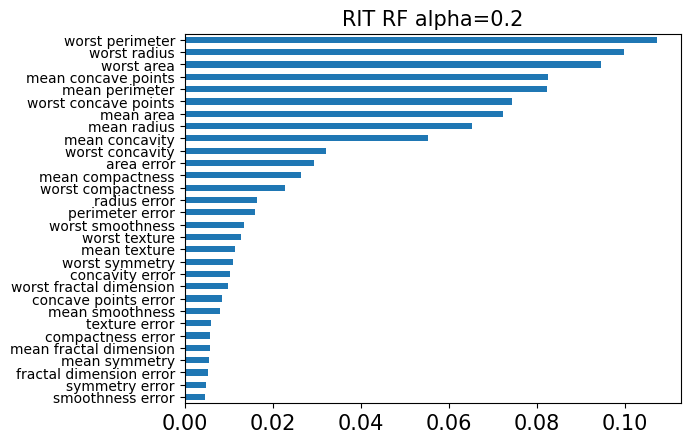

<Axes: >

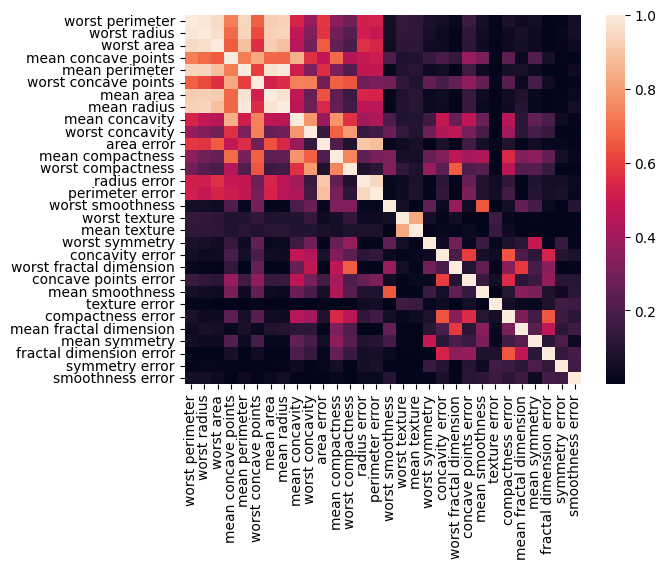

In [3]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
score_func = accuracy_score

# RF
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [6], 'n_estimators': [10000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(RandomForestClassifier(max_features='sqrt', 
                                          random_state=0, 
                                          max_leaf_nodes=2**max(params['max_depth']),
                                          bootstrap=True,
                                          oob_score=score_func,
                                          n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RF', fontsize=15)
plt.show()

# RIT RF as simple RF
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [8], 'n_estimators': [10000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(MyRandomForestClassifier(max_features='sqrt', 
                                            random_state=0, 
                                            max_leaf_nodes=2**max(params['max_depth']),
                                            bootstrap=True,
                                            oob_score=score_func,
                                            n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RIT RF as simple RF', fontsize=15)
plt.show()

# RIT RF alpha=0.1
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [7], 'n_estimators': [10000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(MyRandomForestClassifier(max_features='sqrt', 
                                            random_state=0, 
                                            max_leaf_nodes=2**max(params['max_depth']),
                                            bootstrap=True,
                                            oob_score=score_func,
                                            n_jobs=max(n_cpu//n_params, 1),
                                            subforest_importance=True,
                                            normalize_importance=False,
                                            rit_alpha=0.1),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RIT RF alpha=0.1', fontsize=15)
plt.show()

# RIT RF alpha=0.2
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [7], 'n_estimators': [10000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(MyRandomForestClassifier(max_features='sqrt', 
                                            random_state=0, 
                                            max_leaf_nodes=2**max(params['max_depth']),
                                            bootstrap=True,
                                            oob_score=score_func,
                                            n_jobs=max(n_cpu//n_params, 1),
                                            subforest_importance=True,
                                            normalize_importance=False,
                                            rit_alpha=0.2),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RIT RF alpha=0.2', fontsize=15)
plt.show()

corr = X[pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).index].corr()**2
sns.heatmap(corr, xticklabels=True, yticklabels=True)

### Two Sigma Connect: Rental Listing Inquiries

{'max_depth': 20, 'n_estimators': 10000}

0.48422664990792713

[({'max_depth': 20, 'n_estimators': 10000}, 0.48422664990792713)]

/tmp/ipykernel_2304728/3704157503.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


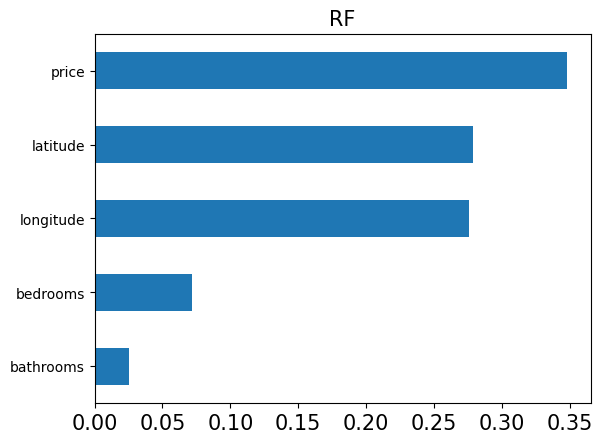

{'max_depth': 20, 'n_estimators': 10000}

0.48470139161807513

[({'max_depth': 20, 'n_estimators': 10000}, 0.48470139161807513)]

/tmp/ipykernel_2304728/3704157503.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


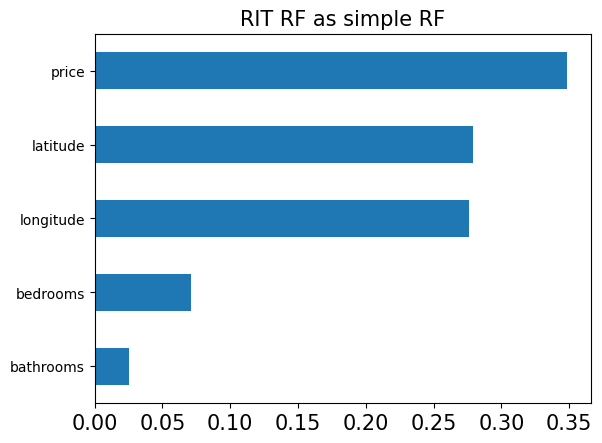

{'max_depth': 20, 'n_estimators': 10000}

0.48470139161807513

[({'max_depth': 20, 'n_estimators': 10000}, 0.48470139161807513)]

/tmp/ipykernel_2304728/3704157503.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


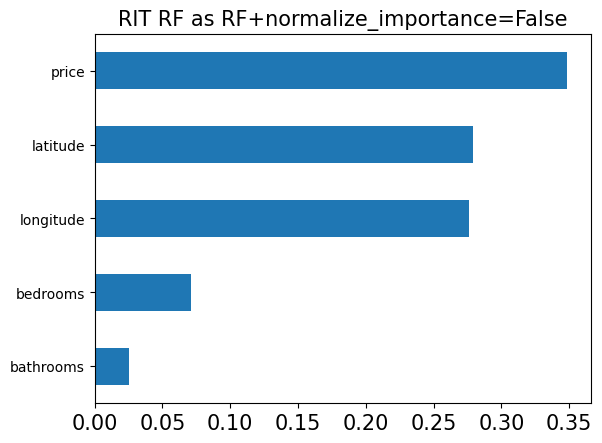

{'max_depth': 20, 'n_estimators': 10000}

0.4818191160227272

[({'max_depth': 20, 'n_estimators': 10000}, 0.4818191160227272)]

/tmp/ipykernel_2304728/3704157503.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


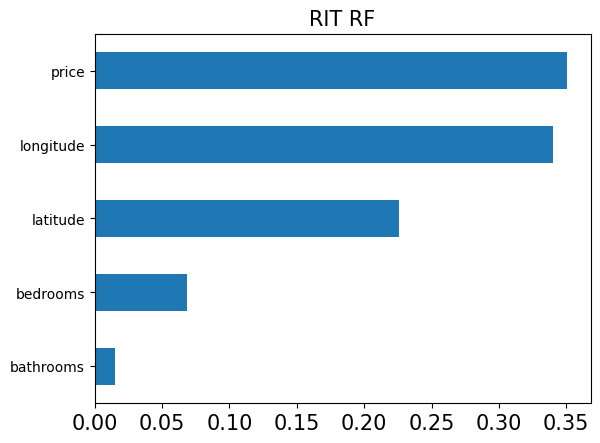

In [9]:
# https://www.kaggle.com/competitions/two-sigma-connect-rental-listing-inquiries
# https://github.com/parrt/random-forest-importances/blob/master/notebooks/data/rent.csv

X = pd.read_csv('data/rent/rent.csv')
X = X.dropna()
y = X['interest_level']
X = X.drop(['interest_level'], axis=1)
X = X.iloc[:, :]
y = y.iloc[:]
score_func = balanced_accuracy_score

# long trainings!

# RF
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [10000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(RandomForestClassifier(max_features='sqrt', 
                                          random_state=0, 
                                          max_leaf_nodes=2**max(params['max_depth']),
                                          bootstrap=True,
                                          oob_score=score_func,
                                          n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring=lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RF', fontsize=15)
plt.show()

#RIT RF as simple RF
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [10000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(MyRandomForestClassifier(max_features='sqrt', 
                                            random_state=0, 
                                            max_leaf_nodes=2**max(params['max_depth']),
                                            bootstrap=True,
                                            oob_score=score_func,
                                            n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RIT RF as simple RF', fontsize=15)
plt.show()

#RIT RF as RF+normalize_importance=False
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [10000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(MyRandomForestClassifier(max_features='sqrt', 
                                            random_state=0, 
                                            max_leaf_nodes=2**max(params['max_depth']),
                                            bootstrap=True,
                                            oob_score=score_func,
                                            n_jobs=max(n_cpu//n_params, 1),
                                            normalize_importance=False),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RIT RF as RF+normalize_importance=False', fontsize=15)
plt.show()
                    
#RIT RF
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [20], 'n_estimators': [10000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(MyRandomForestClassifier(max_features='sqrt', 
                                            random_state=0, 
                                            max_leaf_nodes=2**max(params['max_depth']),
                                            bootstrap=True,
                                            oob_score=score_func,
                                            n_jobs=max(n_cpu//n_params, 1),
                                            rit_alpha=0.1,
                                            subforest_importance=True,
                                            normalize_importance=False),
                   params,
                   scoring = lambda est, X, y: est.oob_score_,  
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RIT RF', fontsize=15)
plt.show()

### Diabets (regression)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


{'max_depth': 7, 'max_features': 0.2, 'n_estimators': 1000}

-3191.3882949560702

/tmp/ipykernel_2304728/269790912.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


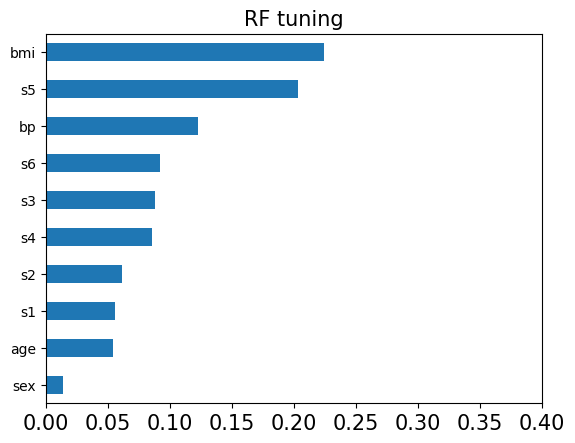

{'max_depth': 6, 'max_features': 0.2, 'n_estimators': 1000, 'rit_alpha': 0.1}

-3193.994989697274

/tmp/ipykernel_2304728/269790912.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


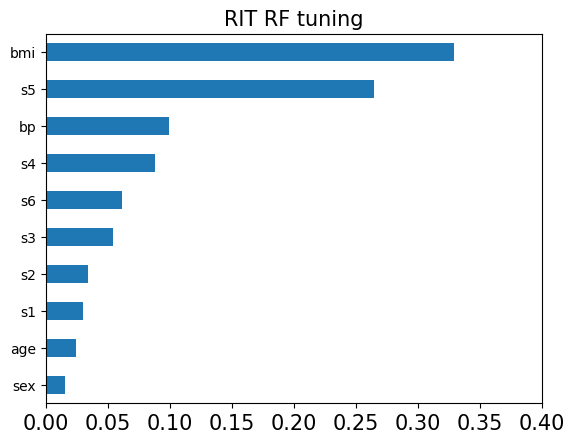

{'max_depth': 6, 'max_features': 0.2, 'n_estimators': 1000}

-3193.994989697274

/tmp/ipykernel_2304728/269790912.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


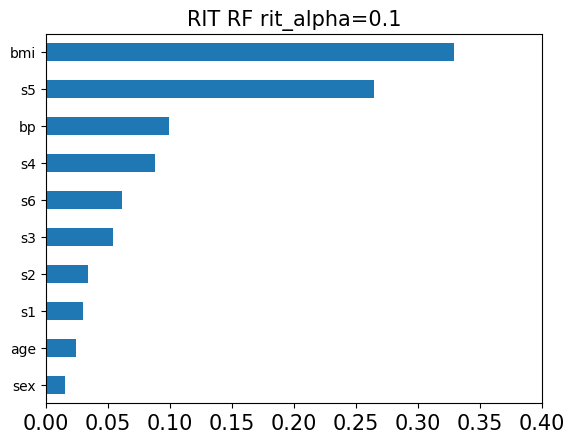

In [10]:
X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=True)
display(X.corr())

def neg_mean_squared_error(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput="uniform_average",
    squared="deprecated",
):
    return -mean_squared_error(y_true, y_pred, 
                               sample_weight=sample_weight, 
                               multioutput=multioutput, 
                               squared=squared)
score_func = neg_mean_squared_error
max_features = 'sqrt'

# RF tuning
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [5, 6, 7], 
          'n_estimators': [1000], 
          'max_features': [1, 0.2, 0.25, 0.33, 'sqrt']}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(RandomForestRegressor(random_state=0, 
                                         max_leaf_nodes=2**max(params['max_depth']),
                                         bootstrap=True,
                                         oob_score=score_func,
                                         n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
#         list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']))
)
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
plt.gca().set_xlim(0, 0.4)
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)
plt.gca().set_title('RF tuning', fontsize=15)
plt.show()

#RIT RF runing
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [6, 7, 8], 
          'n_estimators': [1000], 
          'rit_alpha': [None, -1, -0.5, -0.1, 0, 0.1], 
          'max_features': [1, 0.2, 0.25, 0.33, 'sqrt']
         }
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(MyRandomForestRegressor(random_state=0, 
                                           max_leaf_nodes=2**max(params['max_depth']),
                                           bootstrap=True,
                                           oob_score=score_func,
                                           n_jobs=max(n_cpu//n_params, 1),
                                           subforest_importance=True,
                                           normalize_importance=False,
                                           importance_avrg='median'),
                   params,
                   scoring = lambda est, X, y: est.oob_score_,
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
#       list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']))
)
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
plt.gca().set_xlim(0, 0.4)
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)
plt.gca().set_title('RIT RF tuning', fontsize=15)
plt.show()

#RIT RF rit_alpha=0.1
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [6, 7, 8], 
          'n_estimators': [1000], 
          'max_features': [1, 0.2, 0.25, 0.33, 'sqrt']
         }
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(MyRandomForestRegressor(random_state=0, 
                                           max_leaf_nodes=2**max(params['max_depth']),
                                           bootstrap=True,
                                           oob_score=score_func,
                                           n_jobs=max(n_cpu//n_params, 1),
                                           rit_alpha=0.1,
                                           subforest_importance=True,
                                           normalize_importance=False,
                                           importance_avrg='median'),
                   params,
                   scoring = lambda est, X, y: est.oob_score_,  
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
#       list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']))
)
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
plt.gca().set_xlim(0, 0.4)
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)
plt.gca().set_title('RIT RF rit_alpha=0.1', fontsize=15)
plt.show()

### Wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


{'max_depth': 3, 'n_estimators': 10000}

0.9859154929577465

/tmp/ipykernel_2304728/3743089278.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


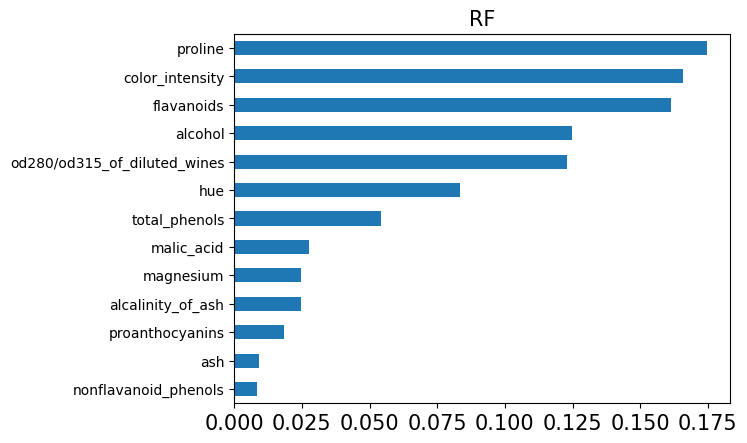

{'max_depth': 3,
 'n_estimators': 10000,
 'normalize_importance': True,
 'rit_alpha': None,
 'subforest_importance': True}

0.9859154929577465

/tmp/ipykernel_2304728/3743089278.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


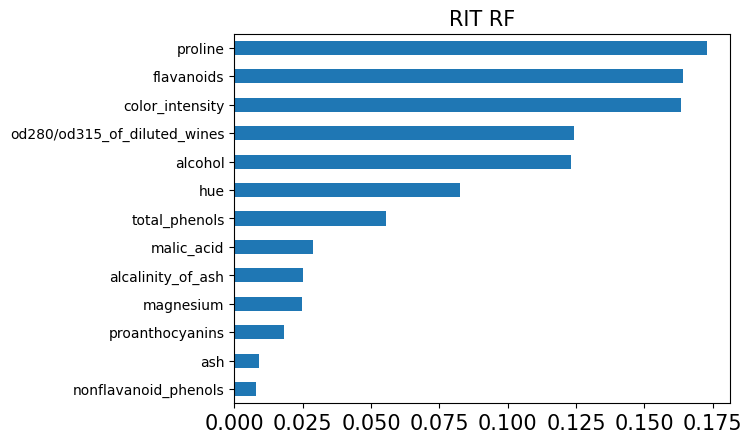

{'max_depth': 3,
 'n_estimators': 10000,
 'normalize_importance': False,
 'rit_alpha': 0.1,
 'subforest_importance': True}

0.9859154929577465

/tmp/ipykernel_2304728/3743089278.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


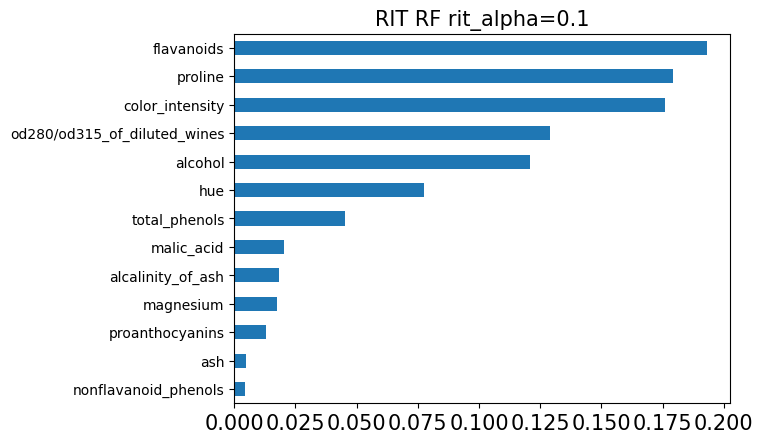

In [11]:
X, y = load_wine(return_X_y=True, as_frame=True)
display(X.corr())
score_func = balanced_accuracy_score

# RF
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [3, 4, 5, 6], 'n_estimators': [10000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(RandomForestClassifier(max_features='sqrt', 
                                          random_state=0, 
                                          max_leaf_nodes=2**max(params['max_depth']),
                                          bootstrap=True,
                                          oob_score=score_func,
                                          n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring=lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
#         list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']))
       )
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RF', fontsize=15)
plt.show()
                    
#RIT RF
# you can play with tuning, up to your CPU performance:
params = {
    'max_depth': [3, 4, 5, 6], 'n_estimators': [10000], 
    'rit_alpha': [None, -1, -0.5, -0.1, 0, 0.1],
    'subforest_importance': [True, False],
    'normalize_importance': [True, False]
}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(MyRandomForestClassifier(max_features='sqrt', 
                                            random_state=0, 
                                            max_leaf_nodes=2**max(params['max_depth']),
                                            bootstrap=True,
                                            oob_score=score_func,
                                            n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring = lambda est, X, y: est.oob_score_,  
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
#         list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']))
       )
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RIT RF', fontsize=15)
plt.show()

#RIT RF rit_alpha=0.1
params = {
    'max_depth': [3], 'n_estimators': [10000], 
    'rit_alpha': [0.1],
    'subforest_importance': [True],
    'normalize_importance': [False]
}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(MyRandomForestClassifier(max_features='sqrt', 
                                            random_state=0, 
                                            max_leaf_nodes=2**max(params['max_depth']),
                                            bootstrap=True,
                                            oob_score=score_func,
                                            n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring = lambda est, X, y: est.oob_score_,  
                   cv=[(np.arange(X.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
#         list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']))
       )
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)  
plt.gca().set_title('RIT RF rit_alpha=0.1', fontsize=15)
plt.show()

## HARD DATASETS

### Madelon data study

In [12]:
X = pd.read_csv('data/madelon/madelon_train.data', sep=' ',  header=None)
y = pd.read_csv('data/madelon/madelon_train.labels', sep=' ', header=None)
X = X.iloc[:, :-1]
y = y.values.ravel()

In [13]:
f_base = [64, 493, 48, 28, 204]                        # 5 selected features
f_copy = [128, 153, 318, 451, 378, 336, 442, 475, 453] # correlatred a-la duplicates of f_base
f_add = [105, 281, 433, 241, 338, 472]                 # dependent from f_base and f_copy
X = X[f_base + f_copy + f_add]
X_ = X.drop(f_copy + f_add, axis=1) #base
X_

,64,493,48,28,204
0,648,485,440,459,484
1,488,338,499,475,495
2,485,650,460,491,472
3,415,572,529,472,464
4,387,435,429,472,508
...,...,...,...,...,...
1995,482,588,505,462,528
1996,311,424,448,496,507
1997,540,687,544,500,523
1998,543,750,490,471,510


In [14]:
X[f_base + f_copy].corr()

,64,493,48,28,204,128,153,318,451,378,336,442,475,453
64,1.000000,0.096506,0.137924,-0.039841,0.005478,-0.574244,0.250414,-0.040147,-0.038254,0.136467,0.990429,0.028309,-0.733741,0.095336
493,0.096506,1.000000,0.159147,-0.188980,0.019838,0.383013,0.551599,-0.193950,-0.195548,0.157815,0.093783,0.401095,-0.445748,0.988458
48,0.137924,0.159147,1.000000,0.009225,0.011306,0.478230,0.021602,0.006771,0.013302,0.988338,0.133993,-0.131130,0.026427,0.157679
28,-0.039841,-0.188980,0.009225,1.000000,-0.007307,0.395637,-0.018738,0.989628,0.989168,0.009787,-0.034778,-0.658747,0.017306,-0.192371
204,0.005478,0.019838,0.011306,-0.007307,1.000000,0.013330,-0.001658,-0.004812,-0.002558,0.018542,0.001489,0.017648,-0.017721,0.024522
128,-0.574244,0.383013,0.478230,0.395637,0.013330,1.000000,0.143011,0.391878,0.393862,0.478415,-0.575316,-0.247265,0.348454,0.381475
153,0.250414,0.551599,0.021602,-0.018738,-0.001658,0.143011,1.000000,-0.020600,-0.021651,0.018466,0.249468,-0.342413,-0.011848,0.556635
318,-0.040147,-0.193950,0.006771,0.989628,-0.004812,0.391878,-0.020600,1.000000,0.988690,0.007488,-0.034352,-0.660870,0.019943,-0.197955
451,-0.038254,-0.195548,0.013302,0.989168,-0.002558,0.393862,-0.021651,0.988690,1.000000,0.013895,-0.033041,-0.661844,0.020473,-0.199149
378,0.136467,0.157815,0.988338,0.009787,0.018542,0.478415,0.018466,0.007488,0.013895,1.000000,0.133026,-0.130048,0.026015,0.155796


In [15]:
X_.corr()

,64,493,48,28,204
64,1.000000,0.096506,0.137924,-0.039841,0.005478
493,0.096506,1.000000,0.159147,-0.188980,0.019838
48,0.137924,0.159147,1.000000,0.009225,0.011306
28,-0.039841,-0.188980,0.009225,1.000000,-0.007307
204,0.005478,0.019838,0.011306,-0.007307,1.000000


#### add duplicates

{'max_depth': 15, 'n_estimators': 10000}

0.7745

[({'max_depth': 14, 'n_estimators': 10000}, 0.772),
 ({'max_depth': 15, 'n_estimators': 10000}, 0.7745),
 ({'max_depth': 16, 'n_estimators': 10000}, 0.7745)]

/tmp/ipykernel_2304728/1554217817.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


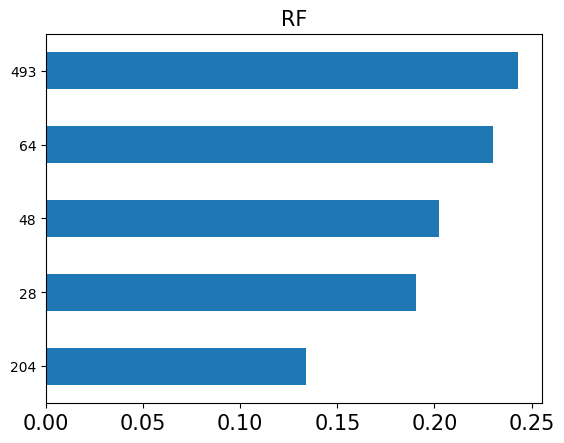

{'max_depth': 15, 'n_estimators': 10000}

0.7785

[({'max_depth': 14, 'n_estimators': 10000}, 0.7775),
 ({'max_depth': 15, 'n_estimators': 10000}, 0.7785),
 ({'max_depth': 16, 'n_estimators': 10000}, 0.776)]

/tmp/ipykernel_2304728/1554217817.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


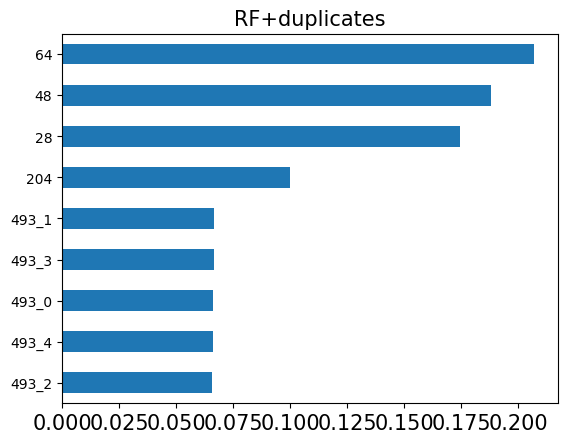

{'max_depth': 16, 'n_estimators': 10000}

0.7835

[({'max_depth': 14, 'n_estimators': 10000}, 0.7805),
 ({'max_depth': 15, 'n_estimators': 10000}, 0.78),
 ({'max_depth': 16, 'n_estimators': 10000}, 0.7835)]

/tmp/ipykernel_2304728/1554217817.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


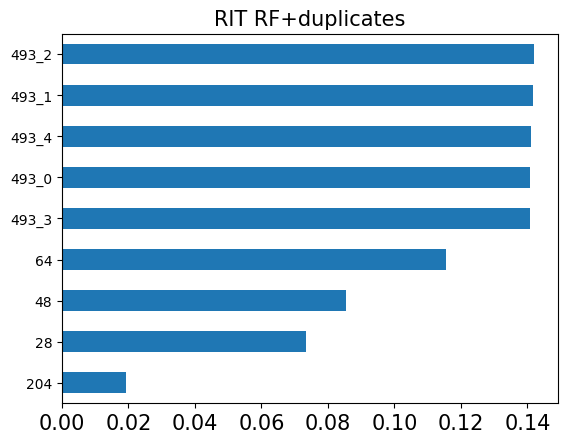

In [16]:
score_func = accuracy_score
max_features = 0.5 # 'sqrt'

# RF
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [14, 15, 16], 'n_estimators': [10000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(RandomForestClassifier(max_features=max_features, 
                                          random_state=0, 
                                          max_leaf_nodes=2**max(params['max_depth']),
                                          bootstrap=True,
                                          oob_score=score_func,
                                          n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring=lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X_.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X_, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X_.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)
plt.gca().set_title('RF', fontsize=15)
plt.show()

# add duplicates
X__ = X_.copy()
X__.columns = [str(s) for s in X__.columns]
X__['493_0'] = X__['493'].copy()
X__['493_1'] = X__['493'].copy()
X__['493_2'] = X__['493'].copy()
X__['493_3'] = X__['493'].copy()
X__['493_4'] = X__['493'].copy()
X__ = X__.drop('493', axis=1)

# RF+duplicates
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [14, 15, 16], 'n_estimators': [10000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(RandomForestClassifier(max_features=max_features, 
                                          random_state=0, 
                                          max_leaf_nodes=2**max(params['max_depth']),
                                          bootstrap=True,
                                          oob_score=score_func,
                                          n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring=lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X__.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X__, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X__.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)
plt.gca().set_title('RF+duplicates', fontsize=15)
plt.show()

# RIT RF+duplicates
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [14, 15, 16], 'n_estimators': [10000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(MyRandomForestClassifier(max_features=max_features, 
                                            random_state=0, 
                                            max_leaf_nodes=2**max(params['max_depth']),
                                            bootstrap=True,
                                            oob_score=score_func,
                                            n_jobs=max(n_cpu//n_params, 1),
                                            subforest_importance=True,
                                            normalize_importance=False,
                                            rit_alpha=0.1),
                   params,
                   scoring=lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X__.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X__, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X__.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels() 
plt.gca().set_xticklabels(xtl, fontsize=15)
plt.gca().set_title('RIT RF+duplicates', fontsize=15)
plt.show()

#### add a-la duplicates features

,64,493,48,28,204,453
64,1.000000,0.096506,0.137924,-0.039841,0.005478,0.095336
493,0.096506,1.000000,0.159147,-0.188980,0.019838,0.988458
48,0.137924,0.159147,1.000000,0.009225,0.011306,0.157679
28,-0.039841,-0.188980,0.009225,1.000000,-0.007307,-0.192371
204,0.005478,0.019838,0.011306,-0.007307,1.000000,0.024522
453,0.095336,0.988458,0.157679,-0.192371,0.024522,1.000000


{'max_depth': 13, 'n_estimators': 10000}

0.7555

[({'max_depth': 13, 'n_estimators': 10000}, 0.7555)]

/tmp/ipykernel_2304728/1955785409.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


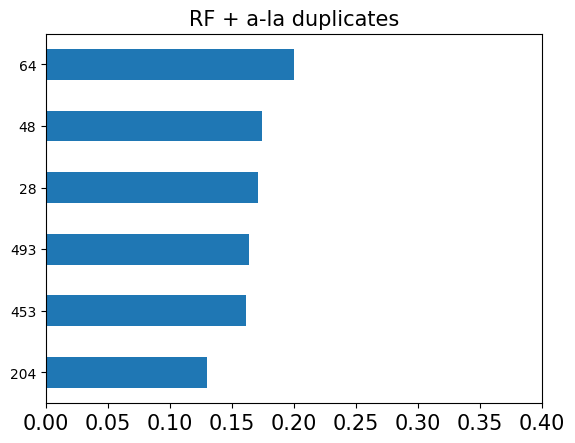

{'max_depth': 13, 'n_estimators': 10000}

0.734

[({'max_depth': 13, 'n_estimators': 10000}, 0.734)]

/tmp/ipykernel_2304728/1955785409.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


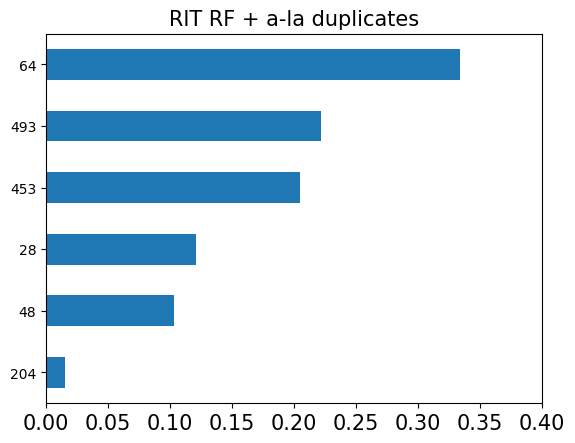

In [17]:
# add a-la duplicates
X__ = X_.copy()
X__[453] = X[453].copy() # similar to 493
# X__[336] = X[336].copy() # similar to 64
X__.columns = [str(s) for s in X__.columns]
display(X__.corr())
score_func = accuracy_score
max_features = 1

# RF + a-la duplicates
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [13], 'n_estimators': [10000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(RandomForestClassifier(max_features=max_features, 
                                          random_state=0, 
                                          max_leaf_nodes=2**max(params['max_depth']),
                                          bootstrap=True,
                                          oob_score=score_func,
                                          n_jobs=max(n_cpu//n_params, 1)),
                   params,
                   scoring=lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X__.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X__, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X__.columns).sort_values(ascending=True).plot(kind='barh')
plt.gca().set_xlim(0, 0.4)
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)
plt.gca().set_title('RF + a-la duplicates', fontsize=15)
plt.show()

# RIT RF + a-la duplicates
# you can play with tuning, up to your CPU performance:
params = {'max_depth': [13], 'n_estimators': [10000]}
n_params = math.prod([len(v) for k, v in params.items()])
clf = GridSearchCV(MyRandomForestClassifier(max_features=max_features, 
                                            random_state=0, 
                                            max_leaf_nodes=2**max(params['max_depth']),
                                            bootstrap=True,
                                            oob_score=score_func,
                                            n_jobs=max(n_cpu//n_params, 1),
                                            subforest_importance=True,
                                            normalize_importance=False,
                                            rit_alpha=0.5,
                                            importance_avrg='median'),
                   params,
                   scoring=lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X__.shape[0]), np.arange(0))],
                   n_jobs=min(n_params, n_cpu))
clf.fit(X__, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_, #rf.oob_score_, 
        list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'])))
plt.figure()
pd.Series(rf.feature_importances_, index=X__.columns).sort_values(ascending=True).plot(kind='barh')
plt.gca().set_xlim(0, 0.4)
xtl = plt.gca().get_xticklabels() 
plt.gca().set_xticklabels(xtl, fontsize=15)
plt.gca().set_title('RIT RF + a-la duplicates', fontsize=15)
plt.show()

### Synthetic - TBD

{'max_depth': 14}

0.8402751380143717

/tmp/ipykernel_1781719/2962245933.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtl, fontsize=15)


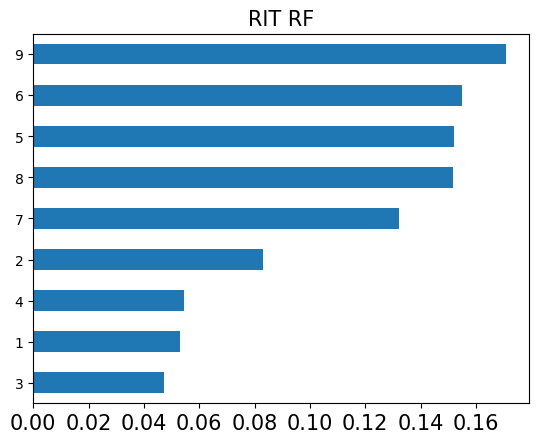

<Axes: >

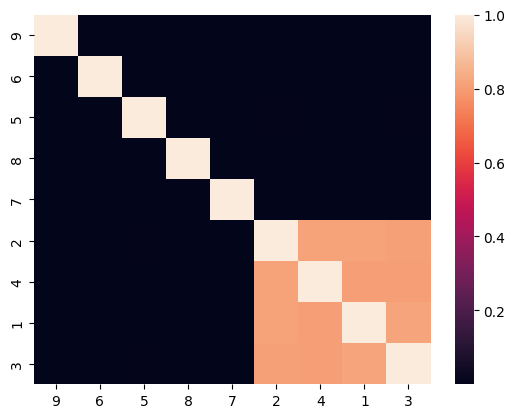

In [2]:
n = 1000
p = 9

Sigma = np.zeros([p, p])
Sigma[:4, :4] = 0.9
np.fill_diagonal(Sigma, 1)

X = np.random.multivariate_normal(np.zeros(p,), Sigma, [n])
eps = np.random.multivariate_normal([0], [[0.5]], n)
y = X @ np.array([[0, 1, 0, 0, 1, 1, 1, 1, 1]]).T + eps.sum(axis=1)
X = pd.DataFrame(X, columns = [str(c+1) for c in range(p)])

#RF
clf = GridSearchCV(RandomForestRegressor(criterion='squared_error',
                                         n_estimators=1000, 
                                         max_features='sqrt', 
                                         random_state=0, 
                                         n_jobs=-1, 
                                         oob_score=True),
                   {'max_depth': [13, 14, 15]},
                   scoring = lambda est, X, y: est.oob_score_,
                   cv = [(np.arange(X.shape[0]), np.arange(0))], 
                   n_jobs=1)
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_)
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)
plt.gca().set_title('RF', fontsize=15)
# plt.gcf().set_figheight(3)
plt.show()

#RIT RF
clf = GridSearchCV(MyRandomForestRegressor(criterion='squared_error',
                                           n_estimators=1000, 
                                           max_features='sqrt', 
                                           random_state=0, 
                                           n_jobs=-1, 
                                           oob_score=True),
                   {'max_depth': [13, 14, 15]},
                   scoring = lambda est, X, y: est.oob_score_,
                   cv = [(np.arange(X.shape[0]), np.arange(0))], 
                   n_jobs=1)
clf.fit(X, y)
rf = clf.best_estimator_
display(clf.best_params_, clf.best_score_)
plt.figure()
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')
xtl = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(xtl, fontsize=15)
plt.gca().set_title('RIT RF', fontsize=15)
plt.show()

corr = X[pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).index].corr()**2
sns.heatmap(corr, xticklabels=True, yticklabels=True)